# Proyecto de analisis de datos de Venta de Viedo Juegos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 📊 Información General
| Aspecto  | Descripcion |
| ------------- |:-------------:|
| Nombre del DataSet      |   vgsales.csv   |
| Período cubierto      | 1980 - 2020    |
| Total de Registros      |   16598   |
| Total de Variables      |   11 columnas   |
| Fuente de Datos      |   Kaggle   |
| Propósito del Análisis      |  Análisis Descriptivo   |

## Estructura de Variables

| Variable  | Descripción | Tipo |
| ------------- |:-------------:|:---------------:|
| Rank     |   Ranking de ventas globales   | int64  |
| Name      | Nombre del Juego    | object |
| Platform      |   Plataforma de lanzamiento   | object |
| Year      |   Año de lanzamiento del juego   | float64 |
| Genre      |   Género del juego   | object |
| Publisher      |  Editor de juego   | object |
| NA_Sales      |  Ventas en America del Norte (millones)  | float64 |
| EU_Sales      |  Ventas en Europa (millones)   | float64 |
| JP_Sales      |  Ventas en Japon (millones)   | float64 |
| Other_Sales      |  Ventas en el resto del mundo (millones)   | float64 |
| Global_Sales      |  Ventas globales (millones)  | float64 |

In [27]:
# leemos el archivo vgsales
vgsales = pd.read_csv('CSV/vgsales.csv')
vgsales.head()

# Identificamos las regiones donde se vendieron los juegos 
regiones = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colmunas_ventas = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']

In [28]:
# observamos la informacion de cada columna
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [29]:
# identificamos los datos nulos que hay por cada columna
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [30]:
# rellenamos los datos de las regiones con su promedio(para que no se altere el promedio real),solo si el valor es NaN
vgsales[regiones] = vgsales[regiones].fillna(vgsales[regiones].mean())

# rellenamos los datos de Global_Sales si es NaN con la suma de las ventas de cada region
vgsales['Global_Sales'] = vgsales['Global_Sales'].fillna(vgsales[regiones].sum(axis=1))
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
# Primero entender la magnitud del problema
print(f"NaN en Year: {vgsales['Year'].isna().sum()} ({vgsales['Year'].isna().mean()*100:.1f}%)")
print(f"NaN en Publisher: {vgsales['Publisher'].isna().sum()} ({vgsales['Publisher'].isna().mean()*100:.1f}%)")

NaN en Year: 271 (1.6%)
NaN en Publisher: 58 (0.3%)


In [14]:
# eliminamos los datos nulos siempre y cuando en la fila todo los datos sean NaN
filas_antes = len(vgsales)
vgsales = vgsales.dropna(subset=['Year','Publisher'])
filas_ahora = len(vgsales)
print(f'se eliminaran {filas_antes-filas_ahora}')

se eliminaran 307


In [15]:
# verificamos la cnt de datos duplicados 
cnt_duplicados = vgsales.duplicated().sum()

# Eliminamos si hubiera datos duplicados 
if cnt_duplicados > 0:
    vgsales = vgsales.drop_duplicates()
    print(f'Se eliminaron {cnt_duplicados} fila(s)')
else:
    print('No hay datos duplicados en el DataFrame')

No hay datos duplicados en el DataFrame


In [16]:
# vemos la descripcion de los campos numericos
vgsales[colmunas_ventas].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
# funcion para agrupar por una columna especifica y que muestre la suma de las ventas 
def agruparBy(columnas: list):
    # Asegurar que columnas sea una lista
    if isinstance(columnas, str):
        columnas = [columnas]

    return vgsales.groupby(columnas)[colmunas_ventas].sum().reset_index()

In [18]:
DataFrame_byYear = agruparBy(['Year'])
DataFrame_byYear

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36
5,1985.0,33.73,4.74,14.56,0.92,53.94
6,1986.0,12.50,2.84,19.81,1.93,37.07
7,1987.0,8.46,1.41,11.63,0.20,21.74
8,1988.0,23.87,6.59,15.76,0.99,47.22
9,1989.0,45.15,8.44,18.36,1.50,73.45


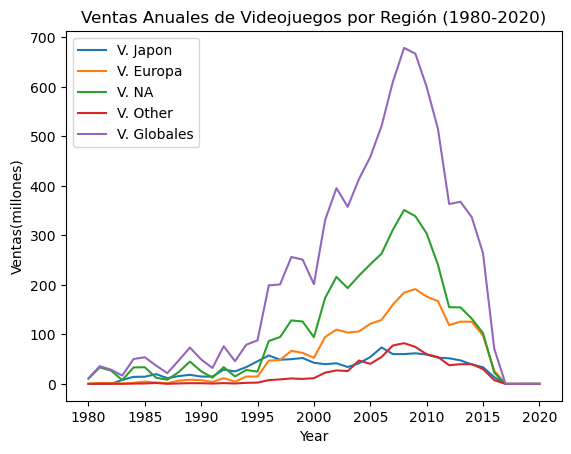

Los datos a partir del Año 2018 son incompletos 


In [19]:
# Cnt. ventas desde el 1980 a 2020 por region
fig, ax = plt.subplots()
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['JP_Sales'],label='V. Japon')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['EU_Sales'],label='V. Europa')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['NA_Sales'],label='V. NA')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['Other_Sales'],label='V. Other')
ax.plot(DataFrame_byYear['Year'],DataFrame_byYear['Global_Sales'],label= 'V. Globales')
ax.set_xlabel('Year')
ax.set_ylabel('Ventas(millones)')
ax.set_title('Ventas Anuales de Videojuegos por Región (1980-2020)')
ax.legend()
plt.show()
print("Los datos a partir del Año 2018 son incompletos ")

In [20]:
DataFrame_byGenre = agruparBy('Genre')
DataFrame_byGenre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,861.77,516.48,158.65,184.92,1722.84
1,Adventure,101.93,63.74,51.99,16.70,234.59
2,Fighting,220.74,100.00,87.15,36.19,444.05
3,Misc,396.92,211.77,106.67,73.92,789.87
4,Platform,445.99,200.65,130.65,51.51,829.13
5,Puzzle,122.01,50.52,56.68,12.47,242.21
6,Racing,356.93,236.31,56.61,76.68,726.76
7,Role-Playing,326.50,187.57,350.29,59.38,923.83
8,Shooter,575.16,310.45,38.18,101.90,1026.20
9,Simulation,181.78,113.02,63.54,31.36,389.98


In [21]:
DataFrame_byName = agruparBy('Name').sort_values('Global_Sales',ascending=False).head(10)
DataFrame_byName

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10849,Wii Sports,41.49,29.02,3.77,8.46,82.74
3650,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
9201,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
9581,Tetris,26.17,2.95,6.03,0.69,35.84
5493,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
10851,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
7247,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
1210,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
6632,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01
1206,Call of Duty: Black Ops II,14.08,11.05,0.72,3.88,29.72


In [22]:
DataFrame_byPlatform = agruparBy('Platform').sort_values('Global_Sales',ascending=False).head(10)
DataFrame_byPlatform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,572.92,332.63,137.54,190.47,1233.46
28,X360,594.33,278.00,12.30,84.67,969.60
17,PS3,388.90,340.47,79.21,140.81,949.35
26,Wii,497.37,264.35,68.28,79.20,909.81
4,DS,388.53,194.05,175.02,60.29,818.91
15,PS,334.71,212.38,139.78,40.69,727.39
6,GBA,178.43,72.49,46.56,7.51,305.62
19,PSP,107.09,67.16,75.89,41.52,291.71
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,92.04,137.35,0.17,24.33,254.70


In [23]:
DataFrame_byPublisher = agruparBy('Publisher').sort_values('Global_Sales',ascending=False).head(10)
DataFrame_byPublisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,815.75,418.30,454.99,95.19,1784.43
138,Electronic Arts,584.22,367.38,13.98,127.63,1093.39
21,Activision,426.01,213.72,6.54,74.79,721.41
455,Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
524,Ubisoft,252.81,163.03,7.33,50.16,473.54
493,Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
487,THQ,208.60,94.60,5.01,32.11,340.44
275,Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
445,Sega,108.78,81.41,56.19,24.30,270.70
347,Namco Bandai Games,69.38,42.61,126.84,14.64,253.65


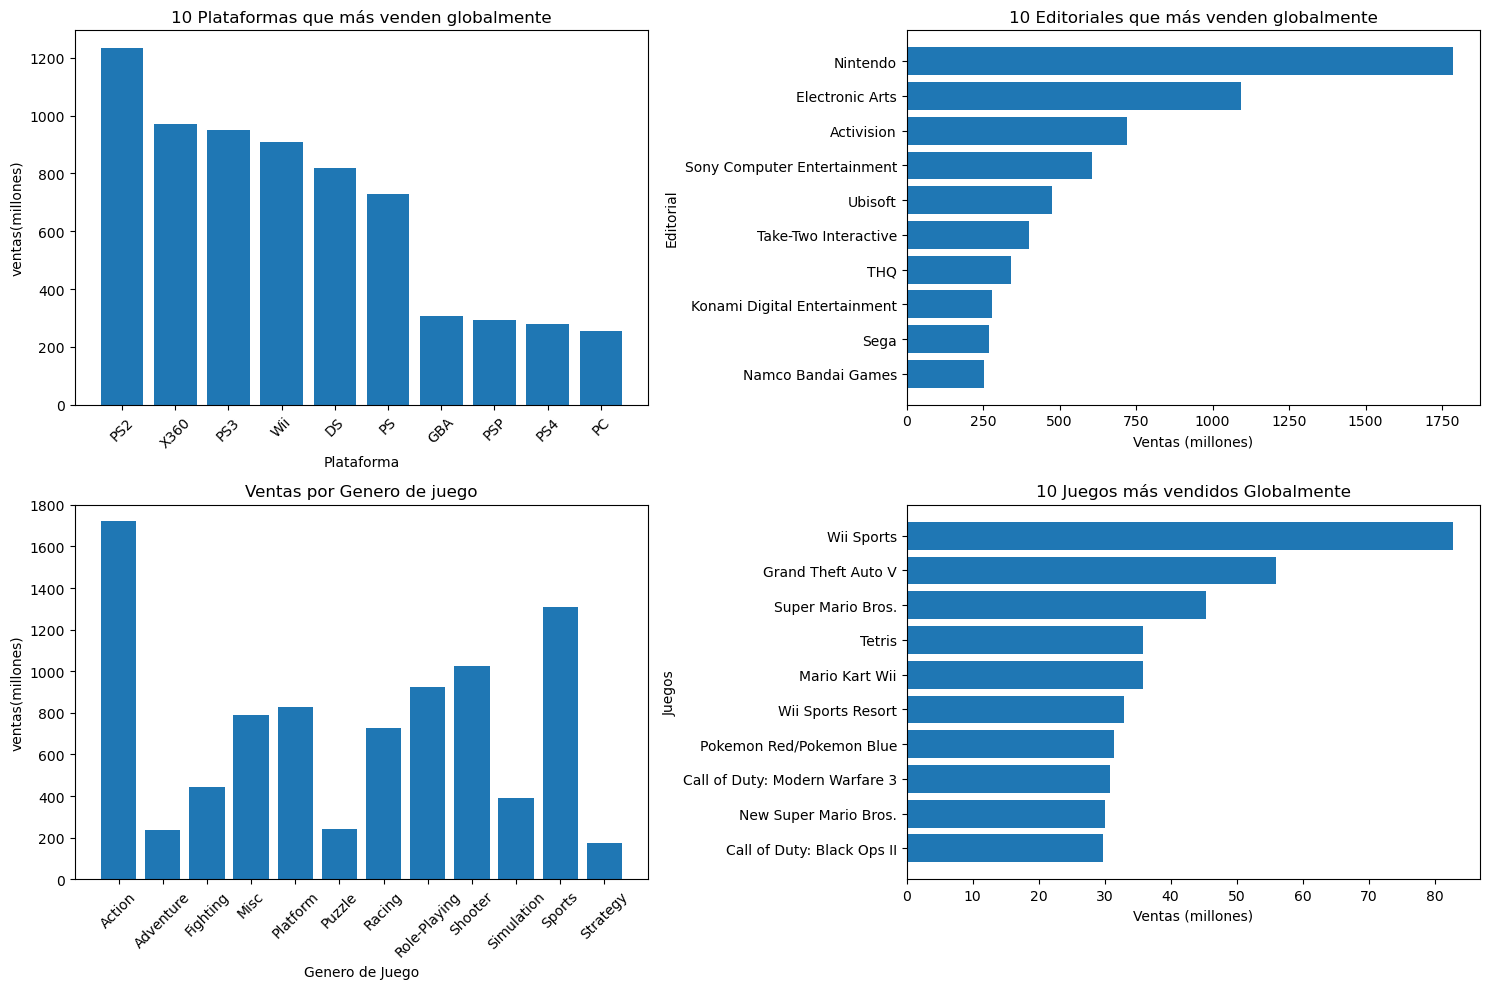

In [24]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))


# Gráfico de barras vertical para las plataformas
ax[0,0].bar(DataFrame_byPlatform['Platform'],DataFrame_byPlatform['Global_Sales'])
ax[0,0].tick_params(axis='x',rotation=45)
ax[0,0].set_title('10 Plataformas que más venden globalmente')
ax[0,0].set_ylabel('ventas(millones)')
ax[0,0].set_xlabel('Plataforma')

# Gráfico horizontal para los 10 Editoriales que más vendio
ax[0, 1].barh(DataFrame_byPublisher['Publisher'], DataFrame_byPublisher['Global_Sales'])
ax[0, 1].set_title('10 Editoriales que más venden globalmente')
ax[0, 1].set_xlabel('Ventas (millones)')
ax[0, 1].set_ylabel('Editorial')
ax[0, 1].invert_yaxis()

# Gráfico de barras vertical para las Genero
ax[1,0].bar(DataFrame_byGenre['Genre'],DataFrame_byGenre['Global_Sales'])
ax[1,0].tick_params(axis='x',rotation=45)
ax[1,0].set_ylim(0,1800)
ax[1,0].set_title('Ventas por Genero de juego')
ax[1,0].set_ylabel('ventas(millones)')
ax[1,0].set_xlabel('Genero de Juego')

# Gráfico horizontal para los 10 juegos más vendidos
ax[1,1].barh(DataFrame_byName['Name'], DataFrame_byName['Global_Sales'])
ax[1,1].set_title('10 Juegos más vendidos Globalmente')
ax[1,1].set_xlabel('Ventas (millones)')
ax[1,1].set_ylabel('Juegos')
ax[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

In [25]:
data = vgsales.groupby('Genre')['Name'].count().reset_index().sort_values('Name',ascending=False)
data

,Genre,Name
0,Action,3251
10,Sports,2304
3,Misc,1686
7,Role-Playing,1470
8,Shooter,1282
1,Adventure,1274
6,Racing,1225
4,Platform,875
9,Simulation,848
2,Fighting,836


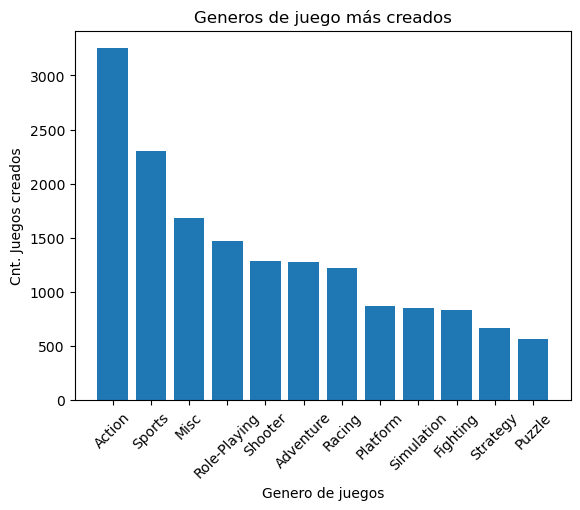

In [26]:
fig, ax = plt.subplots()
ax.bar(data['Genre'],data['Name'])
ax.tick_params(axis='x',rotation= 45)
ax.set_ylabel('Cnt. Juegos creados')
ax.set_xlabel('Genero de juegos') 
ax.set_title('Generos de juego más creados')
plt.show()